In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 152.1/152.1 kB 3.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.2/12.2 MB 764.2 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 840.2 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 480.9/480.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Importing required libraries

In [2]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English



# Importing Dataset

In [3]:
df=pd.read_csv('fake_job_postings.csv',encoding='latin-1')

In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
df.shape

(17880, 18)

In [7]:
#checking for anything wrong in the dataset and incorrect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# checking null values

In [8]:

df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Droping the unneccessary columns from data

In [9]:
df1=df.drop(['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type'],axis=1)

In [10]:
df1

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


# Checking size of data after droping columns

In [11]:
df1.shape

(17880, 12)

# Filling columns which has null values ,but useful for our predictions

In [12]:
df1.fillna('',inplace=True)

In [13]:
import matplotlib.pyplot as plt

#  Checking whether the majority number of postings are real or fake

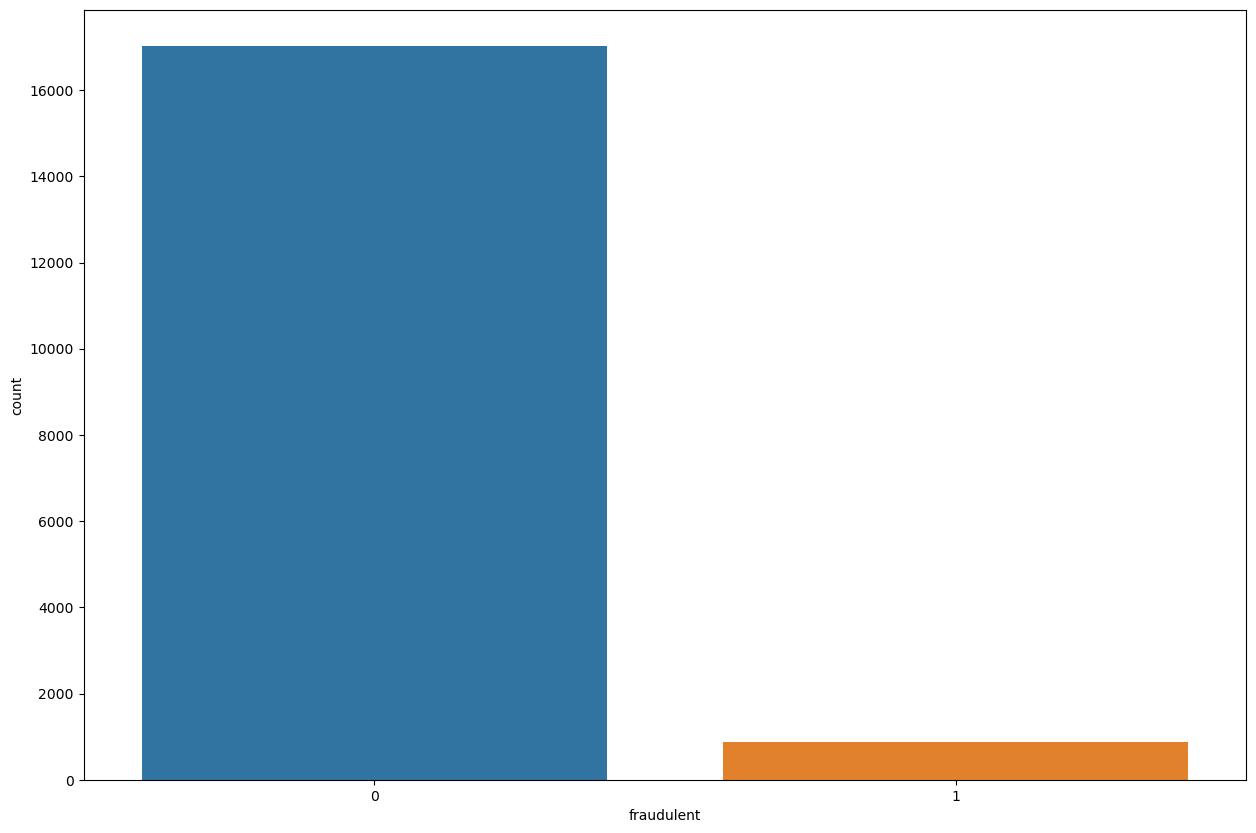

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='fraudulent')
plt.show()
#most of the jobs posted are real jobs

# Count of fraudulent and non fraudulent postings

In [15]:
#Checking the count of real and fake jobs
df1.groupby('fraudulent')['fraudulent'].count()
#real job posting are 17014
#fake job posting are 866

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

# Checking which job posting requires more experience

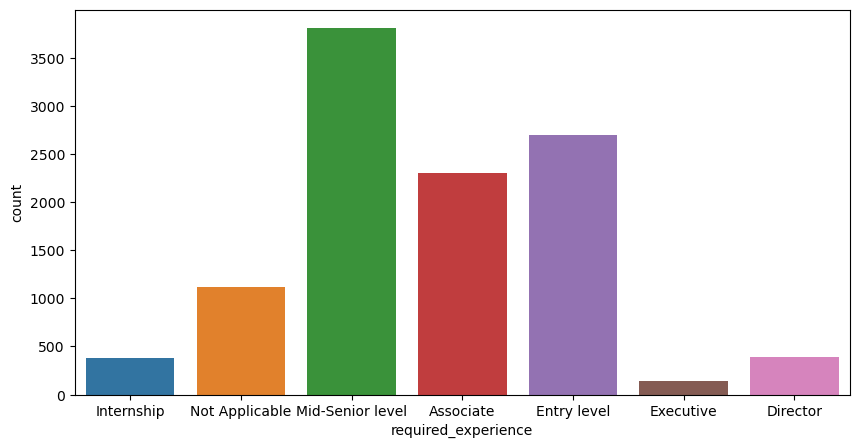

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='required_experience')
plt.show()
#from below graph we come to know that Mid senior requires more experience and Excecutive requires less experience.

In [17]:
#splitting country from the column location in order to check job postings according to the countries
def split(location):
    if isinstance(location, float):
        return ''  # or any other default value you prefer
    location = location.split(',')
    return location[0]

In [18]:
df1['country'] = df1['location'].apply(split)

In [19]:
df1.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [20]:
top_14_countries = df1['country'].value_counts().head(14)


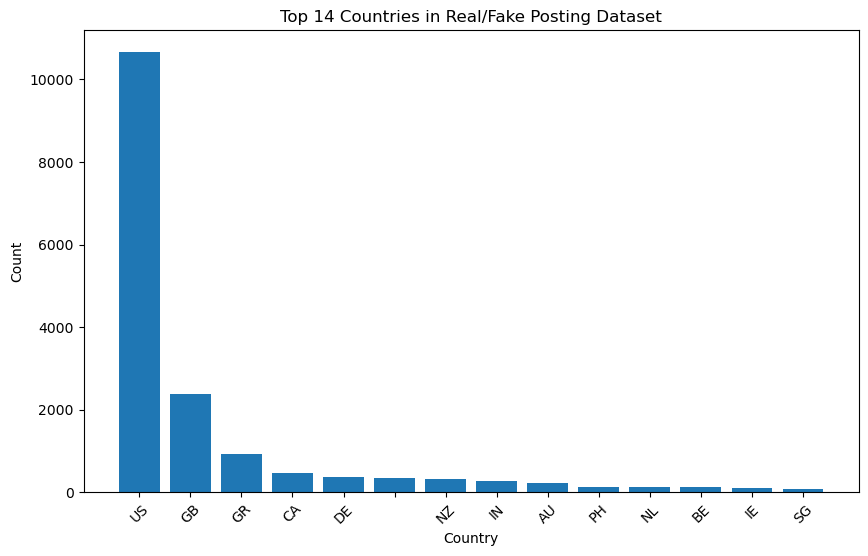

In [21]:
# Plotting graph for only top 14 countries
plt.figure(figsize=(10, 6))
plt.bar(top_14_countries.index, top_14_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 14 Countries in Real/Fake Posting Dataset')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Plotting graph only for top 7 required education
top_7_required_education = df1['required_education'].value_counts().head(7)

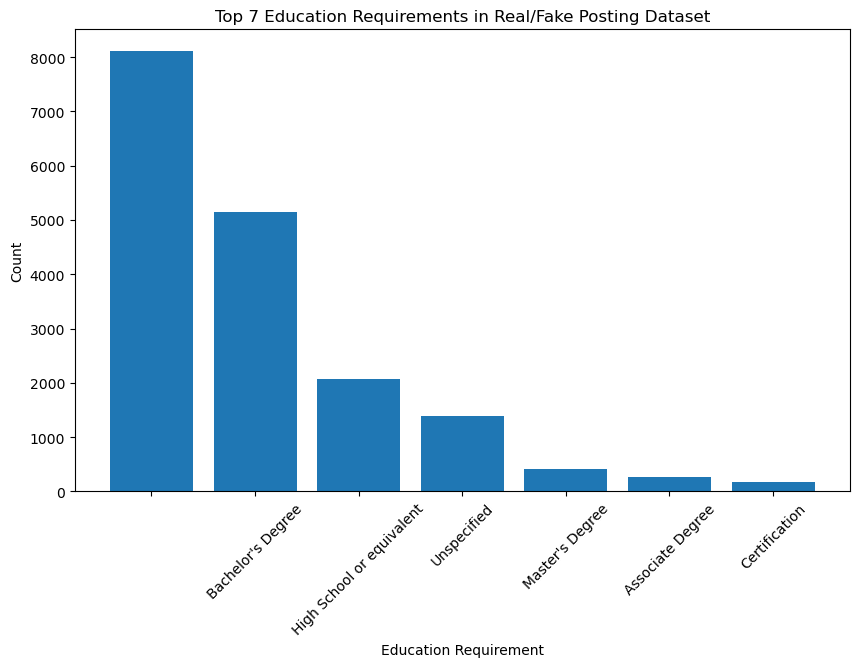

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(top_7_required_education.index, top_7_required_education.values)
plt.xlabel('Education Requirement')
plt.ylabel('Count')
plt.title('Top 7 Education Requirements in Real/Fake Posting Dataset')
plt.xticks(rotation=45)
plt.show()

In [24]:
#Checking the job titles that are used in fraudulent job postings
(df1[df1.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

In [25]:
#Checking the job titles that are used in non -fraudulent job posting
(df1[df1.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64

In [26]:
# Combining the features that have text into a single column called text
df1['text']=df1['title']+' '+df1['company_profile']+' '+df1['description']+' '+df1['requirements']+' '+df1['benefits']
del df1['title']
del df1['location']
del df1['department']
del df1['company_profile']
del df1['description']
del df1['requirements']
del df1['benefits']
del df1['required_experience']
del df1['required_education']
del df1['industry']
del df1['function']
del df1['country']

In [27]:
df1.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [28]:
#creating text for fraudulent and non-fraudulent jobs
fraud_jobs_text=df1[df1.fraudulent==1].text
non_fraud_jobs_text=df1[df1.fraudulent==0].text

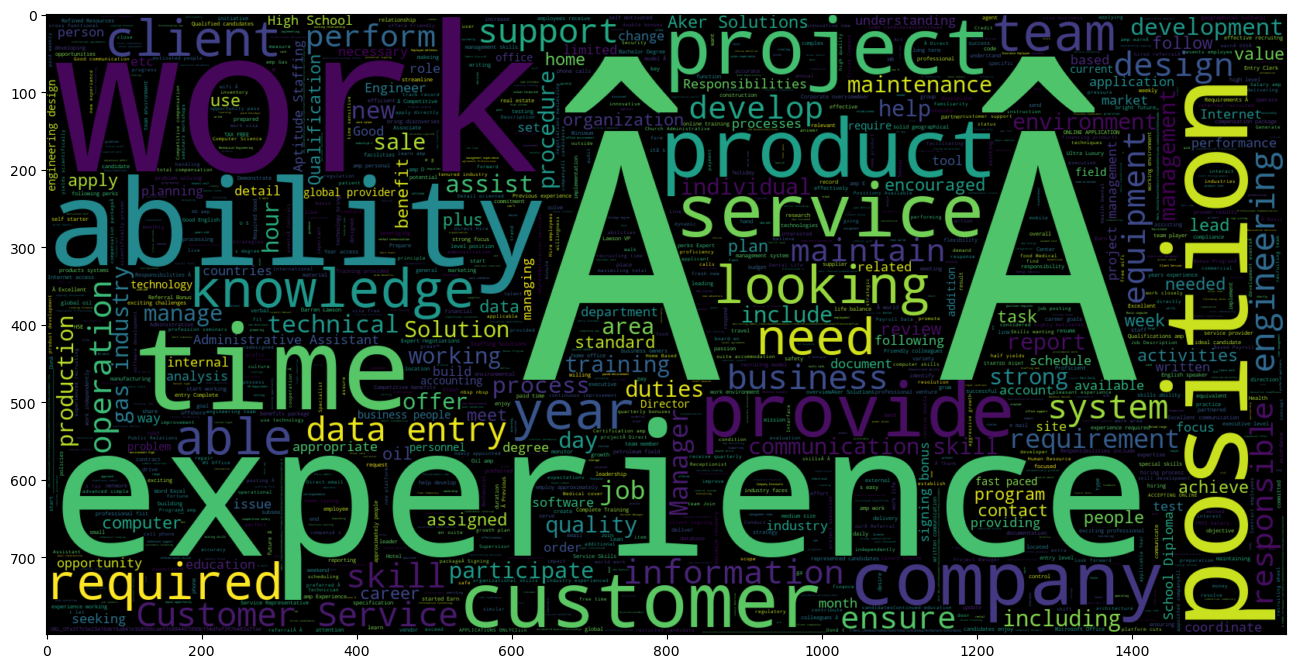

In [29]:
#plotting word cloud for fraudulent jobs
STOPWORDS=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
word_cloud=WordCloud(min_font_size=3,max_words= 3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(fraud_jobs_text)))
plt.imshow(word_cloud,interpolation='bilinear')

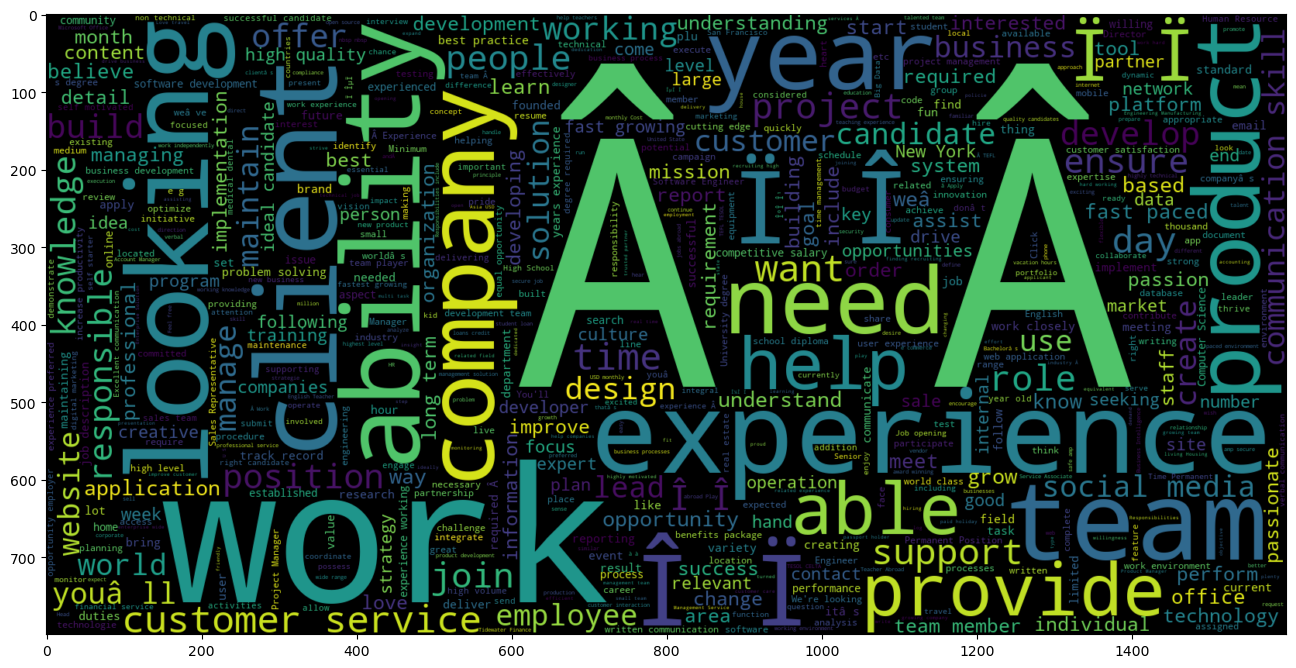

In [30]:
#plotting word cloud for non-fraudulent jobs
STOPWORDS=spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
word_cloud=WordCloud(min_font_size=3,max_words= 3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(non_fraud_jobs_text)))
plt.imshow(word_cloud,interpolation='bilinear')

In [49]:
!pip install spacy && python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 4.8 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
 #Creating a list for punctuation marks
punctuation_marks=string.punctuation

national_language_processing=spacy.load("en_core_web_sm")
stop_words=spacy.lang.en.stop_words.STOP_WORDS
parser=English()
def spacy_tokenizer(sentence):
        my_tokens=parser(sentence)
        my_tokens=[word.lemma_.lower().strip() if word.lemma_!= "-PRON-" else word.lower_ for word in my_tokens]
        tokens=[word for word in my_tokens if word not in stop_words and word not in punctuation_marks]
        return my_tokens

            
    
    
    
    

In [32]:
class predictors(TransformerMixin):
    def transformer(self, X, **transform_params):
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
def clean_text(text):
        return text.strip().lower()

In [33]:
#cleaning data
df1['text'] = df1['text'].apply(clean_text)

In [34]:
cv=TfidfVectorizer(max_features=100)
x=cv.fit_transform(df1['text'])
df2=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
df1.drop(['text'],axis=1,inplace=True)
main_df=pd.concat([df2,df1],axis=1)

C:\Users\K Kannan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041226,0.000000,0.042464,0.036495,0.000000,0.754691,0.000000,0.078684,0.000000,...,0.000000,0.000000,0.186047,0.051093,0.068125,0.000000,0.000000,0.000000,0.000000,0
1,0.022007,0.070916,0.035509,0.024348,0.041852,0.029918,0.491209,0.056784,0.060156,0.035140,...,0.000000,0.078180,0.165943,0.043945,0.117186,0.101877,0.000000,0.207299,0.130658,0
2,0.000000,0.000000,0.178508,0.000000,0.042078,0.090239,0.399798,0.114182,0.000000,0.000000,...,0.000000,0.062883,0.309848,0.058910,0.000000,0.000000,0.000000,0.096194,0.075066,0
3,0.023411,0.000000,0.018887,0.000000,0.000000,0.095478,0.696723,0.000000,0.031996,0.037382,...,0.023259,0.049900,0.075655,0.046748,0.000000,0.108375,0.020381,0.050890,0.059568,0
4,0.000000,0.000000,0.068383,0.000000,0.040298,0.028807,0.608117,0.082015,0.115847,0.000000,...,0.000000,0.000000,0.159784,0.028209,0.037612,0.000000,0.000000,0.030709,0.107837,0


In [36]:
#splitting x and y 
X=main_df.iloc[:,:-1]
Y=main_df.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3)

In [38]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((12516, 100), (12516,), (5364, 100), (5364,))

# Building Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [41]:
prediction=rfc.predict(X_test)

In [42]:
train_prediction=rfc.predict(X_train)

In [43]:
test_score=accuracy_score(y_test,prediction)

In [44]:
train_score=accuracy_score(y_train,train_prediction)

In [45]:
test_score

0.970730797912006

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,prediction)
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5124
           1       0.99      0.35      0.52       240

    accuracy                           0.97      5364
   macro avg       0.98      0.67      0.75      5364
weighted avg       0.97      0.97      0.96      5364



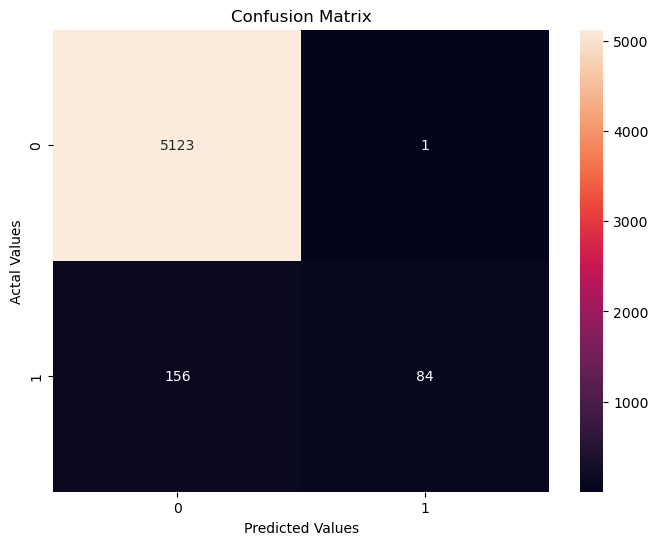

In [47]:
con_matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize = (8,6))

sns.heatmap(con_matrix, annot = True, fmt = 'd')

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

plt.show()

In [1]:
import pickle

In [48]:
pickle.dump(rfc, open('FineTech_app_model.pickle','wb'))

In [49]:
model_pl=pickle.load(open('FineTech_app_model.pickle','rb'))

In [50]:
y_pred_pl=model_pl.predict(X_test)

In [51]:
cm_pl=confusion_matrix(y_test,prediction)
print('Confusion matrix- \n',cm_pl)

Confusion matrix- 
 [[5123    1]
 [ 156   84]]


In [52]:
accuracy_score(y_test,y_pred_pl)

0.970730797912006